# Getting started with `xarray`

The El-Nino dataset is provided in the form of a netCDF file, which can be accessed in python using modules such as `xarray` and `netCDF4-python`. Here, we will quickly go over how to use `xarray` to access these data to get you started with the hackathon.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.patches as patches

As an example, we will work with the sea surface temperature anomaly data from the El-Nino dataset.

In [2]:
# Download and unzip sea surface temperature data
!mkdir ../datasets/elnino
!wget ftp://ftp.ifremer.fr/ifremer/cersat/projects/stuod/hackathon/elnino//cci_sst_anomalies_1981_2018.nc.gz -O ../datasets/elnino/cci_sst_anomalies_1981_2018.nc.gz 
!gunzip -d ../datasets/elnino/cci_sst_anomalies_1981_2018.nc.gz

--2021-03-23 13:12:58--  ftp://ftp.ifremer.fr/ifremer/cersat/projects/stuod/hackathon/elnino//cci_sst_anomalies_1981_2018.nc.gz
           => ‘../datasets/elnino/cci_sst_anomalies_1981_2018.nc.gz’
Resolving ftp.ifremer.fr (ftp.ifremer.fr)... 134.246.142.21
Connecting to ftp.ifremer.fr (ftp.ifremer.fr)|134.246.142.21|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /ifremer/cersat/projects/stuod/hackathon/elnino/ ... done.
==> SIZE cci_sst_anomalies_1981_2018.nc.gz ... 18376930
==> PASV ... couldn't connect to 134.246.142.21 port 48951: Operation timed out
Retrying.

--2021-03-23 13:14:15--  ftp://ftp.ifremer.fr/ifremer/cersat/projects/stuod/hackathon/elnino//cci_sst_anomalies_1981_2018.nc.gz
  (try: 2) => ‘../datasets/elnino/cci_sst_anomalies_1981_2018.nc.gz’
Connecting to ftp.ifremer.fr (ftp.ifremer.fr)|134.246.142.21|:21... connected.
Error in server response. Closing.
Retrying.

--2021-03-23 13:14:17--

NetCDF files can be read in `xarray` using `xarray.open_dataset`, which returns an `xarray.Dataset` object. These are similar to `pandas.DataFrame` objects as we shall see.

In [3]:
sst_dataset = xr.open_dataset('../datasets/elnino/cci_sst_anomalies_1981_2018.nc')
sst_dataset

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 448)
Coordinates:
  * time         (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2018-12-01
  * lat          (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
    month        (time) int64 ...
Data variables:
    sst_anomaly  (time, lat, lon) float32 ...

It is also possible to read multiple files at once using `xarray.open_mfdataset`. To see how this works, let's also download the sea surface salinity data from the El Nino dataset and open this together with the sea surface temperature data using `open_mfdataset`.

In [4]:
# Download and unzip sea surface salinity data
!wget ftp://ftp.ifremer.fr/ifremer/cersat/projects/stuod/hackathon/elnino//cci_sss_anomalies_2010_2019.nc.gz -O ../datasets/elnino/cci_sss_anomalies_2010_2019.nc.gz 
!gunzip -d ../datasets/elnino/cci_sss_anomalies_2010_2019.nc.gz

# Open SST and SSS together into a single xarray Dataset
mfdataset = xr.open_mfdataset('../datasets/elnino/*.nc')
mfdataset

--2021-03-23 13:14:50--  ftp://ftp.ifremer.fr/ifremer/cersat/projects/stuod/hackathon/elnino//cci_sss_anomalies_2010_2019.nc.gz
           => ‘../datasets/elnino/cci_sss_anomalies_2010_2019.nc.gz’
Resolving ftp.ifremer.fr (ftp.ifremer.fr)... 134.246.142.21
Connecting to ftp.ifremer.fr (ftp.ifremer.fr)|134.246.142.21|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /ifremer/cersat/projects/stuod/hackathon/elnino/ ... done.
==> SIZE cci_sss_anomalies_2010_2019.nc.gz ... 4045631
==> PASV ... done.    ==> RETR cci_sss_anomalies_2010_2019.nc.gz ... done.
Length: 4045631 (3.9M) (unauthoritative)

cci_sss_anomalies_2 100%[===================>]   3.86M   407KB/s    in 9.4s    

2021-03-23 13:15:00 (422 KB/s) - ‘../datasets/elnino/cci_sss_anomalies_2010_2019.nc.gz’ saved [4045631]



<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 460)
Coordinates:
  * time         (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2019-12-01
  * lat          (lat) float64 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 353.0 355.0 357.0 359.0
    month        (time) float64 dask.array<chunksize=(460,), meta=np.ndarray>
Data variables:
    sss_anomaly  (time, lat, lon) float32 dask.array<chunksize=(460, 90, 180), meta=np.ndarray>
    sst_anomaly  (time, lat, lon) float32 dask.array<chunksize=(460, 90, 180), meta=np.ndarray>

Two key properties of an xarray dataset are the *coordinates* and *data variables*. `Data variables` are the fields such as SST and SSS anomalies that are stored in the dataset, sort of like the columns in a pandas dataframe, and the `coordinates` are multi-dimentional indices for which we can access the values of these fields, such as the latitude, longitude and time.

![xarray image](../images/xarray.png)

Accessing the data variables in a dataset is similar to how we access columns in a pandas dataframe.

In [5]:
sst_anomaly = mfdataset['sst_anomaly']
sst_anomaly

<xarray.DataArray 'sst_anomaly' (time: 460, lat: 90, lon: 180)>
dask.array<where, shape=(460, 90, 180), dtype=float32, chunksize=(460, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2019-12-01
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
    month    (time) float64 dask.array<chunksize=(460,), meta=np.ndarray>

The result is a multidimensional array that is indexed by the `coordinates` of the dataset. To access the coordinates, we use the `sel` or `isel` method, which is analogous to the `loc`/`iloc` method in `pandas`. The only difference is in whether we access the data by position or by name.

In [6]:
# Access SST anomaly field at the first date it was measured
sst_anomaly.isel(time=0) # Equivalent to `sst_anomaly.sel(time='1981-09-01')`

<xarray.DataArray 'sst_anomaly' (lat: 90, lon: 180)>
dask.array<getitem, shape=(90, 180), dtype=float32, chunksize=(90, 180), chunktype=numpy.ndarray>
Coordinates:
    time     datetime64[ns] 1981-09-01
  * lat      (lat) float64 -89.0 -87.0 -85.0 -83.0 -81.0 ... 83.0 85.0 87.0 89.0
  * lon      (lon) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
    month    float64 dask.array<chunksize=(), meta=np.ndarray>

Below, we plot the monthly mean SST anomaly field for `2015-10` and `2013-01`, where there was a strong El Nino event and no El Nino event respectively. We also put a box around the Nino 3.4 region ($-5^\circ : 5^\circ N$, $190^\circ : 240^\circ E$) to highlight the difference.

/Users/sotakao/opt/anaconda3/envs/informaticslab/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


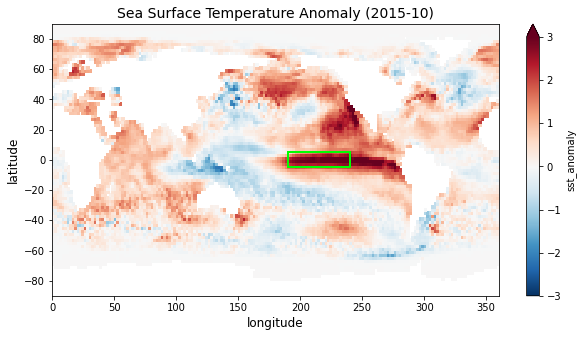

/Users/sotakao/opt/anaconda3/envs/informaticslab/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


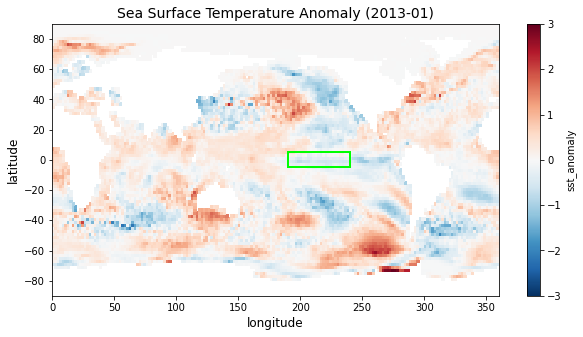

In [7]:
def plot_sst(date, title):
    """
    Args:
        date: string of form 'yyyy-mm'
        title: string
    """
    fig = plt.figure(figsize=(10, 5))
    ax = fig.gca()
    
    # Plot monthly mean SST anomaly field
    sst_anomaly.sel(time=date).mean('time').plot(ax=ax, cmap='RdBu_r', vmin = -3, vmax = 3)
    
    # Put box around Nino 3.4 region
    rect = patches.Rectangle((190, -5), 50, 10, linewidth=2, edgecolor='lime', facecolor='none')
    ax.add_patch(rect)
    
    plt.title(title, fontsize=14)
    plt.xlabel('longitude', fontsize=12)
    plt.ylabel('latitude', fontsize=12)
    plt.show()
    
date_1, date_2 = '2015-10', '2013-01'
plot_sst(date_1, f'Sea Surface Temperature Anomaly ({date_1})')
plot_sst(date_2, f'Sea Surface Temperature Anomaly ({date_2})')

We can clearly see a difference when there is an El Nino event vs when there is no El Nino event!

It is also possible to slice the field to restrict the area to just Nino 3.4 instead of the whole globe.

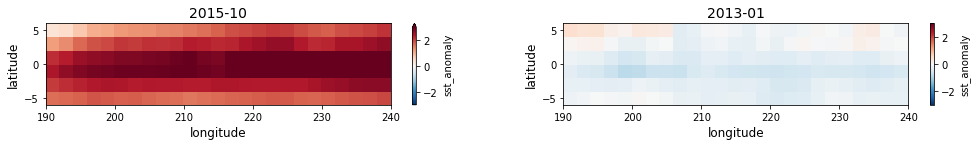

In [8]:
# Restrict area to Nino 3.4
nino34 = sst_anomaly.sel(lat=slice(-5,5), lon=slice(190,240))

# Plot SST anomaly in Nino 3.4 at the two dates
fig = plt.figure(figsize=(17, 1.5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
nino34.sel(time='2015-10').mean('time').plot(ax=ax1, cmap='RdBu_r', vmin = -3, vmax = 3)
nino34.sel(time='2013-01').mean('time').plot(ax=ax2, cmap='RdBu_r', vmin = -3, vmax = 3)
ax1.set_title('2015-10', fontsize=14)
ax1.set_xlabel('longitude', fontsize=12)
ax1.set_ylabel('latitude', fontsize=12)
ax2.set_title('2013-01', fontsize=14)
ax2.set_xlabel('longitude', fontsize=12)
ax2.set_ylabel('latitude', fontsize=12)
plt.show()

The Nino 3.4 index is defined as the 5 month rolling average of the SST anomaly field restricted to the Nino 3.4 region, which we compute below. An El Nino or La Nina event is characterised by periods where the Nino 3.4 index exceeds $\pm 0.4^\circ C$ for a period of $6$ months or longer.

/Users/sotakao/opt/anaconda3/envs/informaticslab/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/sotakao/opt/anaconda3/envs/informaticslab/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


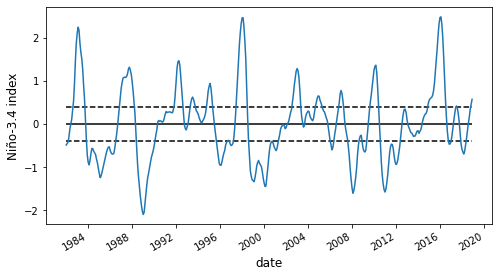

In [9]:
# Compute Nino 3.4 index
nino34_timeseries = nino34.mean('lat').mean('lon')
nino34_index = nino34_timeseries.rolling(time=5).mean().dropna("time")

# Plot Nino 3.4 index timeseries
fig = plt.figure(figsize=(8, 4))
ax = fig.gca()
nino34_index.plot(ax=ax)

# Plot threshold lines
start_time, end_time = nino34_index.get_index('time')[0], nino34_index.get_index('time')[-1]
plt.hlines(0.4, start_time, end_time, colors = 'black', linestyles = 'dashed')
plt.hlines(0, start_time, end_time, colors = 'black')
plt.hlines(-0.4, start_time, end_time, colors = 'black', linestyles = 'dashed')
plt.xlabel('date', fontsize=12)
plt.ylabel(b'Ni\xc3\xb1o-3.4 index'.decode("utf-8"), fontsize=12)
plt.show()